# Simple linear Regression

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

##### Renaming the columns

In [39]:
column_names = {'X1':'Relative_Compactness','X2':'Surface_Area',
                'X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height',
                'X6':'Orientation','X7':'Glazing_Area',
                'X8':'Glazing_Area_Distribition',
                'Y1':'Heating_Load','Y2':'Cooling_Load'}

In [40]:
df = df.rename(columns=column_names)

In [46]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribition,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [45]:
df = df.drop(columns = ['Unnamed: 10','Unnamed: 11'])

##### Selecting the Sample of the data set in
Relative Compactness and
Cooling Load

In [25]:
simple_linear_reg_df= df[['Relative_Compactness','Cooling_Load']] \
                        .sample(15, random_state=2)

In [26]:
simple_linear_reg_df

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


##### Regression Plot

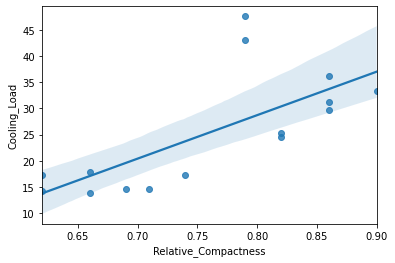

In [27]:
sns.regplot(data=simple_linear_reg_df, x='Relative_Compactness',
            y='Cooling_Load')
plt.show()

---
# Measuring Regression Performance

### Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)
How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared, RMSE and MAE

## 1. Mean Absolute Error (MAE)
MAE is easy and intuitive such that it calculates the sum of the average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible. The mean absolute error is more robust to outliers

Normalizing the dataset

In [47]:
# Firstly we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
features_df = normalised_df.drop(columns = ['Heating_Load','Cooling_Load'])
heating_target = normalised_df['Heating_Load']

Spliting the dataset

In [49]:
# Now, we split our dataset into training and testing dataset. Recall that \
#  we had ealier segmented the Features and Target variables.
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(features_df,
                                                    heating_target, 
                                                    test_size=0.3,
                                                    random_state=1)

Fitting the model and Obtaining the predictions

In [51]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# fit the model into the training dataset
linear_model.fit(x_train,y_train)
# obtain predictions
predicted_values = linear_model.predict(x_test)

## MAE
**MEAN ABSOLUTE ERROR** \
Getting our MAE value with the predicted value

In [54]:
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae,3)

0.063

## 2. Residual Sum of Squares (RSS)
Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

In [58]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss,3)

1.817

## 3. Root Mean Square Error (RMSE)
This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observati

In [61]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.089

## 4. R-SQUARED
Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.

In [62]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predicted_values)
round(r2_score,3)

0.894

---
# Penalization Methods
Ridge Regression L2\
Lasso Regression L1

## 1. Ridge Regression L2
Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or collinearity.

In [63]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

## 2. Lasso Regression L1
Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression) results in simpler and sparse models that allow for better interpretation

In [65]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

In [101]:
# comparing the effect of regularisation
def get_weights_df(model, feat, col_name):
    # this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    # .sort_values() arranges weight in ascending/descending order
    weights_df = pd.DataFrame(weights).reset_index()
    # .reset_index() renumbers the dataframe from 0
    weights_df.columns = ['Features', col_name]
    # assign the column names 'Features' and col_name from the function
    weights_df[col_name].round(3)
    return weights_df

In [69]:
linear_model_weights = get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg,x_train,'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg,x_train,'Lasso_Weight')
# call and assign the function

In [70]:
final_weights = pd.merge(linear_model_weights,ridge_weights_df,on='Features')
final_weights = pd.merge(final_weights,lasso_weights_df,on='Features')

In [102]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribition,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482


In [74]:
linear_model_weights

,Features,Linear_Model_Weight
0,Relative_Compactness,-0.606412
1,Roof_Area,-0.328099
2,Surface_Area,-0.235022
3,Orientation,0.003399
4,Wall_Area,0.018947
5,Glazing_Area_Distribition,0.028452
6,Glazing_Area,0.215042
7,Overall_Height,0.393549


#### **weight_1 to test and understand the function get_weights_df()**

In [94]:
weights_1 = pd.Series(linear_model.coef_, x_train.columns).sort_values()

In [100]:
weights_1

,Features,Linear_Model_Weight
0,Relative_Compactness,-0.606
1,Roof_Area,-0.328
2,Surface_Area,-0.235
3,Orientation,0.003
4,Wall_Area,0.019
5,Glazing_Area_Distribition,0.028
6,Glazing_Area,0.215
7,Overall_Height,0.394


In [95]:
weights_1 = pd.DataFrame(weights_1).reset_index()

In [96]:
weights_1.columns = ['Features','Linear_Model_Weight']

In [99]:
weights_1['Linear_Model_Weight'] = weights_1['Linear_Model_Weight'].round(3)